In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
cars= pd.read_csv('Cars_exportsqls.csv',index_col=0)

In [156]:
cars.head()

,full_name,brand_name,resale_price,registered_year,engine_capacity(cc),insurance,transmission_type,kms_driven,Hand,fuel_type,max_power(bhp),seats,mileage(kmpl),body_type,city
index,,,,,,,,,,,,,,,
0,Maruti Baleno 1.2 Alpha,Maruti,545000,2017,1197,1,Manual,40000,2nd,Petrol,83.10,5.0,21.40,Hatchback,Agra
1,Tata Hexa XTA,Tata,1000000,2018,2179,1,Automatic,70000,2nd,Diesel,153.86,7.0,17.60,MUV,Agra
2,Maruti Swift Dzire VXI,Maruti,450000,2015,1197,1,Manual,70000,3rd,Petrol,83.14,5.0,20.85,Sedan,Agra
3,Maruti Swift Dzire VXI,Maruti,450000,2015,1197,1,Manual,70000,3rd,Petrol,83.14,5.0,20.85,Sedan,Agra
4,Hyundai i10 Magna 1.1,Hyundai,160000,2009,1086,1,Manual,80000,2nd,Petrol,68.05,5.0,19.81,Hatchback,Agra


In [157]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17367 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   full_name            17367 non-null  object 
 1   brand_name           17367 non-null  object 
 2   resale_price         17367 non-null  int64  
 3   registered_year      17367 non-null  int64  
 4   engine_capacity(cc)  17367 non-null  int64  
 5   insurance            17367 non-null  int64  
 6   transmission_type    17367 non-null  object 
 7   kms_driven           17367 non-null  int64  
 8   Hand                 17194 non-null  object 
 9   fuel_type            17367 non-null  object 
 10  max_power(bhp)       17367 non-null  float64
 11  seats                17367 non-null  float64
 12  mileage(kmpl)        17367 non-null  float64
 13  body_type            17305 non-null  object 
 14  city                 17367 non-null  object 
dtypes: float64(3), int64(5), object(7)
m

Insurance, which has binary results in the column, can be convered to string

In [243]:
cars['insurance']= cars['insurance'].astype(str)

In [158]:
cars.describe()

,resale_price,registered_year,engine_capacity(cc),insurance,kms_driven,max_power(bhp),seats,mileage(kmpl)
count,1.736700e+04,17367.000000,17367.000000,17367.000000,1.736700e+04,17367.000000,17367.000000,17367.000000
mean,8.806274e+05,2016.419186,1422.913802,0.914205,5.864910e+04,103.362116,5.205908,18.849724
std,1.082969e+06,3.657752,475.380519,0.280069,6.434944e+04,45.165155,0.668627,5.465558
min,2.800000e+04,2002.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,3.800000e+05,2014.000000,1197.000000,1.000000,3.200000e+04,78.900000,5.000000,16.820000
50%,5.850000e+05,2017.000000,1248.000000,1.000000,5.482700e+04,88.500000,5.000000,18.900000
75%,9.120000e+05,2019.000000,1498.000000,1.000000,7.980000e+04,118.350000,5.000000,21.460000
max,2.250000e+07,2023.000000,5998.000000,1.000000,6.275000e+06,558.000000,14.000000,140.000000


engine capacity column seems to have outliers but they are perfectly valid in the data.

In [159]:
temp_car= cars[cars.duplicated()]

In [160]:
cars.drop(index=temp_car.index,inplace=True)

In [161]:
cars.head()

,full_name,brand_name,resale_price,registered_year,engine_capacity(cc),insurance,transmission_type,kms_driven,Hand,fuel_type,max_power(bhp),seats,mileage(kmpl),body_type,city
index,,,,,,,,,,,,,,,
0,Maruti Baleno 1.2 Alpha,Maruti,545000,2017,1197,1,Manual,40000,2nd,Petrol,83.10,5.0,21.40,Hatchback,Agra
1,Tata Hexa XTA,Tata,1000000,2018,2179,1,Automatic,70000,2nd,Diesel,153.86,7.0,17.60,MUV,Agra
2,Maruti Swift Dzire VXI,Maruti,450000,2015,1197,1,Manual,70000,3rd,Petrol,83.14,5.0,20.85,Sedan,Agra
4,Hyundai i10 Magna 1.1,Hyundai,160000,2009,1086,1,Manual,80000,2nd,Petrol,68.05,5.0,19.81,Hatchback,Agra
5,Hyundai i20 Active 1.2,Hyundai,470000,2015,1197,1,Manual,70000,2nd,Petrol,81.86,5.0,17.19,Hatchback,Agra


Categorical: brand_name,registered_year,insurance,transmission_type,hand,fuel,seats,body_type,city- 9
Num:resale_price,engine_capacity(cc),kms_driven,max_power,mileage-5

### Numerical columns

<AxesSubplot:xlabel='mileage(kmpl)'>

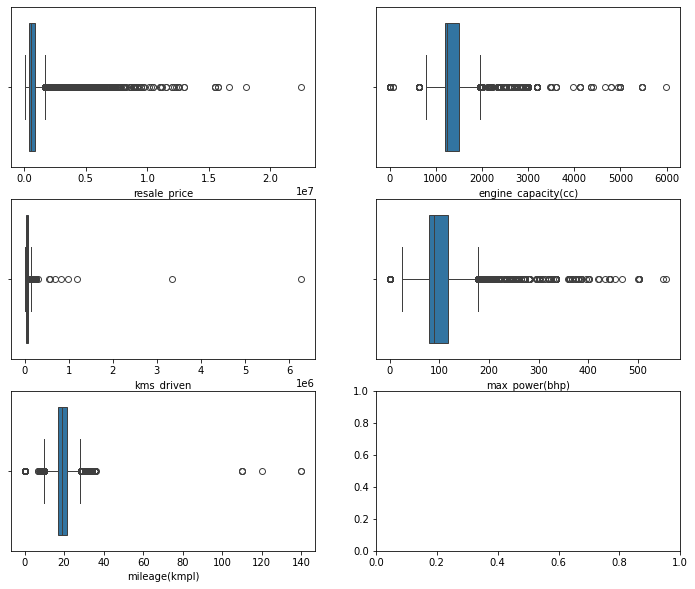

In [162]:
fig,axes= plt.subplots(nrows=3,ncols=2,figsize=(12,10))
axes = axes.flatten()
sns.boxplot(ax=axes[0],data=cars,x='resale_price')
sns.boxplot(ax=axes[1],data=cars,x='engine_capacity(cc)')
sns.boxplot(ax=axes[2],data=cars,x='kms_driven')
sns.boxplot(ax=axes[3],data=cars,x='max_power(bhp)')
sns.boxplot(ax=axes[4],data=cars,x='mileage(kmpl)')

There are a lot of outliers in the data which is visible on every chart. The spread in the car value is very less. The average mileage of 20 kmpl is pretty consistent with the column. Comparatively, the engine capacity and maxmum power columns are well spread though they have lots of outliers too. All of the columns are heavily skewed to the left, i.e. the lower end.

<AxesSubplot:xlabel='mileage(kmpl)', ylabel='Density'>

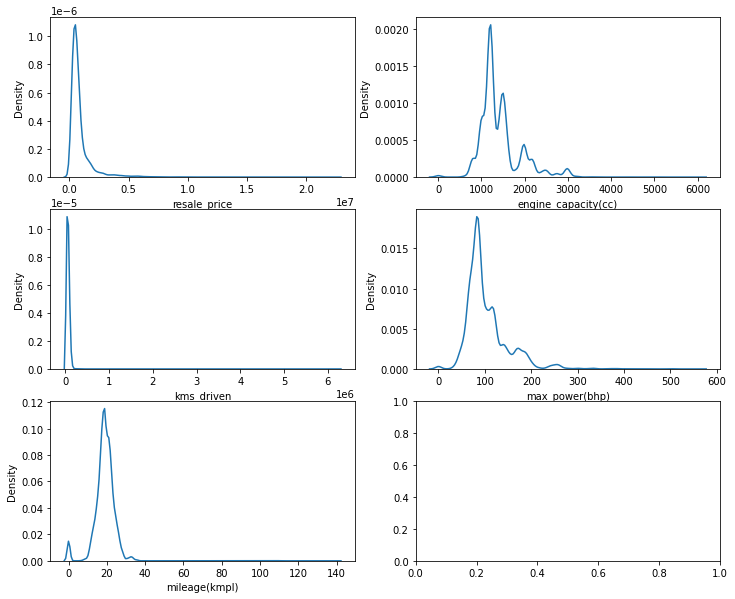

In [163]:

fig,axes= plt.subplots(nrows=3,ncols=2,figsize=(12,10))
axes = axes.flatten()
sns.kdeplot(ax=axes[0],data=cars,x='resale_price')
sns.kdeplot(ax=axes[1],data=cars,x='engine_capacity(cc)')
sns.kdeplot(ax=axes[2],data=cars,x='kms_driven')
sns.kdeplot(ax=axes[3],data=cars,x='max_power(bhp)')
sns.kdeplot(ax=axes[4],data=cars,x='mileage(kmpl)')

There are a lot of outliers in the data which is visible on every chart. The spread in the car value is very less. The average mileage of 20 kmpl is pretty consistent with the column. Comparatively, the engine capacity and maxmum power columns are well spread though they have lots of outliers too. All of the columns are heavily skewed to the left, i.e. the lower end.

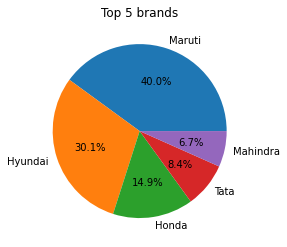

In [164]:
plt.pie(cars['brand_name'].value_counts().head(),autopct='%0.1f%%',labels=cars['brand_name'].value_counts().head().index)
plt.title("Top 5 brands")
plt.show()

Maruti and Hyundai clearly rule the reselling market with 70% share among the top 5

### Categorical columns:

Text(0.5, 1.0, 'Transmission Type')

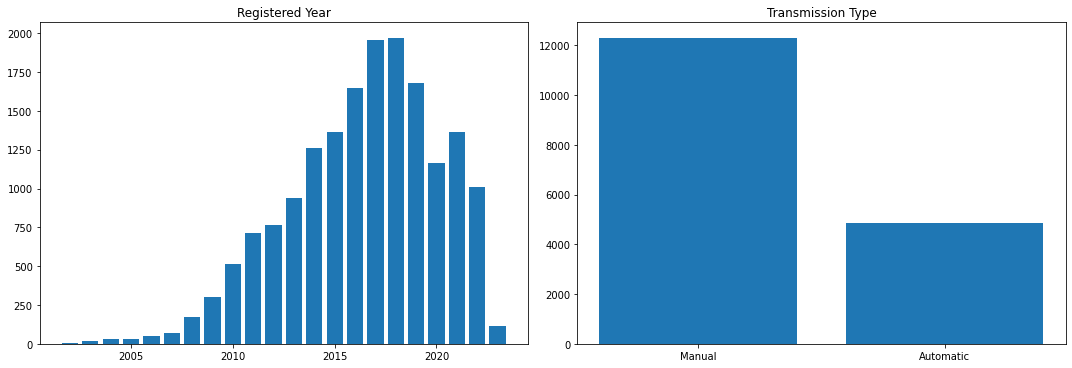

In [165]:

fig,axes= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
axes = axes.flatten()
axes[0].bar(x=cars['registered_year'].value_counts().index,height=cars['registered_year'].value_counts().values)
axes[1].bar(x=cars['transmission_type'].value_counts().index,height=cars['transmission_type'].value_counts().values)

plt.tight_layout()
axes[0].set_title('Registered Year')
axes[1].set_title('Transmission Type')


The data is normally distributed with its peak around 2017-18, and 2/3rd of the cars are manual ones. 

Text(0.5, 1.0, 'Hand')

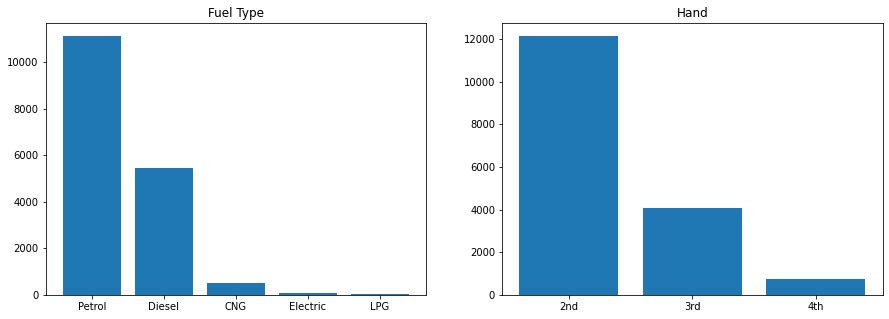

In [166]:
fig,axes= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
axes = axes.flatten()

axes[1].bar(x=cars['Hand'].value_counts().index,height=cars['Hand'].value_counts().values)
axes[0].bar(x=cars['fuel_type'].value_counts().index,height=cars['fuel_type'].value_counts().values)
axes[0].set_title('Fuel Type')
axes[1].set_title('Hand')


Petrol is the most common fuel type followed by Diesel.
The number of owners the vehicle has is directly proportional to their quanitity.

Text(0, 0.5, 'Count')

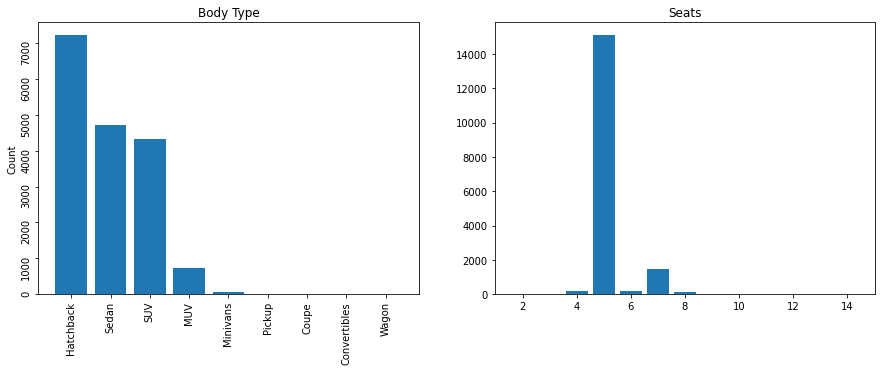

In [458]:
fig,axes= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
axes = axes.flatten()
axes[0].bar(x=cars['body_type'].value_counts().index,height=cars['body_type'].value_counts().values)
axes[1].bar(x=cars['seats'].value_counts().index,height=cars['seats'].value_counts().values)
axes[0].tick_params(rotation=90)



axes[0].set_title('Body Type')
axes[1].set_title('Seats')
axes[0].set_ylabel("Count")


Hatchback ,Sedan and SUV are the most common body types.
5 seater vehicles rule the table almost completely.

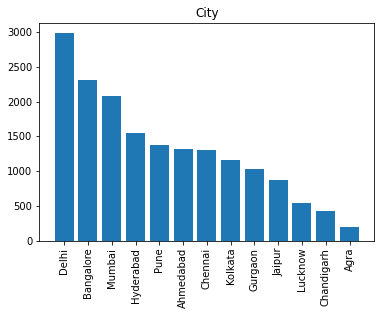

In [168]:

plt.bar(x=cars['city'].value_counts().index, height=cars['city'].value_counts().values)

plt.xticks(rotation=90)
plt.title('City')
plt.show()


### Comparing car price to each factor:

In [149]:
cars.head()

,full_name,brand_name,resale_price,registered_year,engine_capacity(cc),insurance,transmission_type,kms_driven,Hand,fuel_type,max_power(bhp),seats,mileage(kmpl),body_type,city
index,,,,,,,,,,,,,,,
0,Maruti Baleno 1.2 Alpha,Maruti,545000,2017,1197,1,Manual,40000,2nd,Petrol,83.10,5.0,21.40,Hatchback,Agra
1,Tata Hexa XTA,Tata,1000000,2018,2179,1,Automatic,70000,2nd,Diesel,153.86,7.0,17.60,MUV,Agra
2,Maruti Swift Dzire VXI,Maruti,450000,2015,1197,1,Manual,70000,3rd,Petrol,83.14,5.0,20.85,Sedan,Agra
4,Hyundai i10 Magna 1.1,Hyundai,160000,2009,1086,1,Manual,80000,2nd,Petrol,68.05,5.0,19.81,Hatchback,Agra
5,Hyundai i20 Active 1.2,Hyundai,470000,2015,1197,1,Manual,70000,2nd,Petrol,81.86,5.0,17.19,Hatchback,Agra


In [172]:
cars.loc[cars['engine_capacity(cc)'] == 0, 'engine_capacity(cc)'] = np.nan

In [177]:
cars.loc[cars['mileage(kmpl)'] == 0, 'mileage(kmpl)'] = np.nan

Electric vehicles do not work on fuel and hence the concept of mileage and engine capacity does not exist on the same lines of
the fueled vehicles' counterpart. Hence, their values are nullified.

Text(0.5, 1.0, 'Resale price vs Engine capacity')

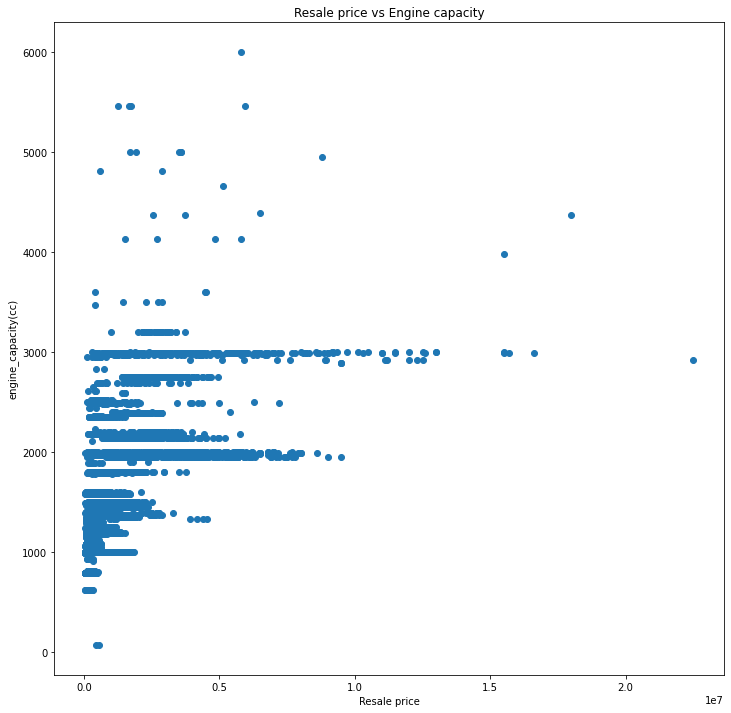

In [452]:
plt.figure(figsize=(12,12))
plt.scatter(cars['resale_price'],cars['engine_capacity(cc)'])
plt.xlabel("Resale price")
plt.ylabel("engine_capacity(cc)")
plt.title("Resale price vs Engine capacity")

As the price increases, the engine capacity increases as well  moderately

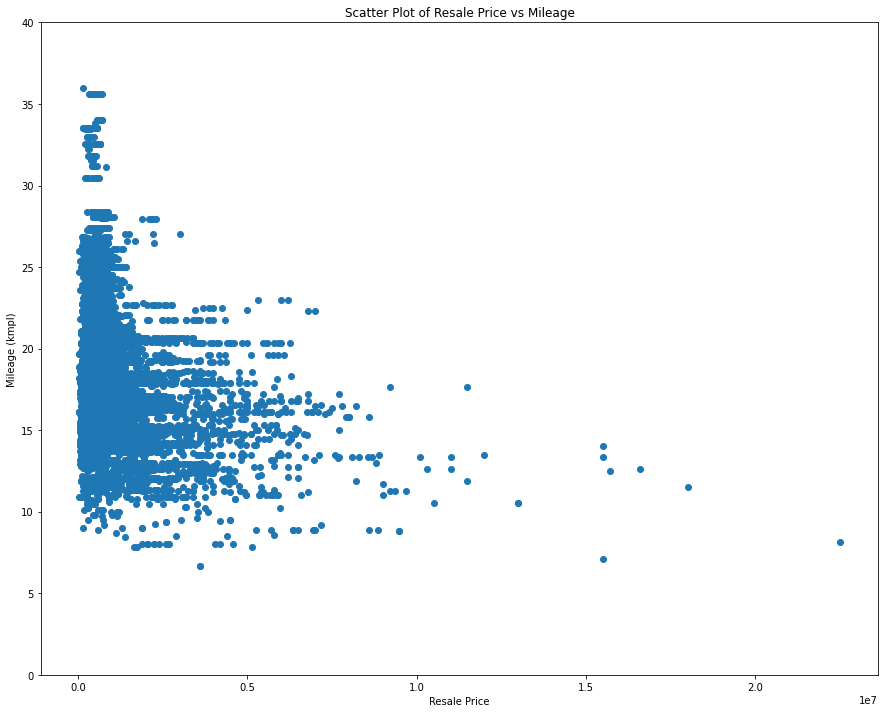

In [199]:

plt.figure(figsize=(15, 12))
plt.scatter(cars['resale_price'], cars['mileage(kmpl)'])  

plt.xlabel('Resale Price')
plt.ylabel('Mileage (kmpl)')
plt.title('Scatter Plot of Resale Price vs Mileage')
plt.ylim(0,40)
plt.show()

As the price increase, the mileage, i.e. the amount kilometers covered consumed perlitre decreases, just like it should ideally.

Text(0.5, 1.0, 'Scatter Plot of Resale Price vs max_power(bhp)')

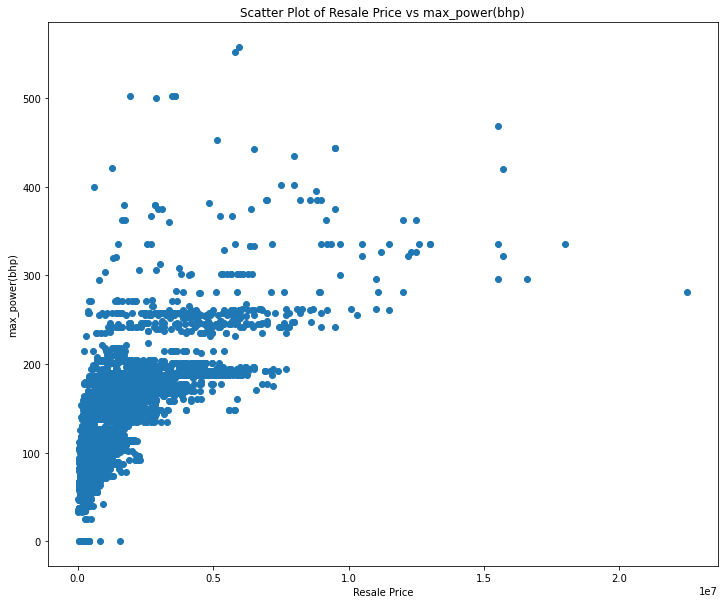

In [459]:

plt.figure(figsize=(12,10))
plt.scatter(cars['resale_price'], cars['max_power(bhp)']) 
plt.xlabel('Resale Price')
plt.ylabel('max_power(bhp)')
plt.title('Scatter Plot of Resale Price vs max_power(bhp)')


Again, as its maximum power producing capacity rises, so does its price.

Text(0.5, 1.0, 'Average Resale Price of Cars by fuel')

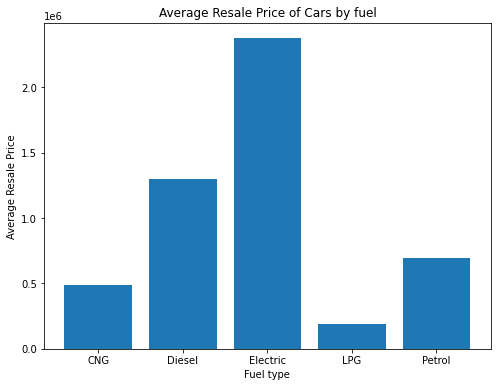

In [473]:

average_resale_price_by_fuel = cars.groupby('fuel_type')['resale_price'].mean()


plt.figure(figsize=(8, 6))
plt.bar(average_resale_price_by_fuel.index, average_resale_price_by_fuel)
plt.xlabel('Fuel type')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price of Cars by fuel')

Electric vehicles are much more expensive that all fuel based options.Petrol is less costlier than diesel cars.

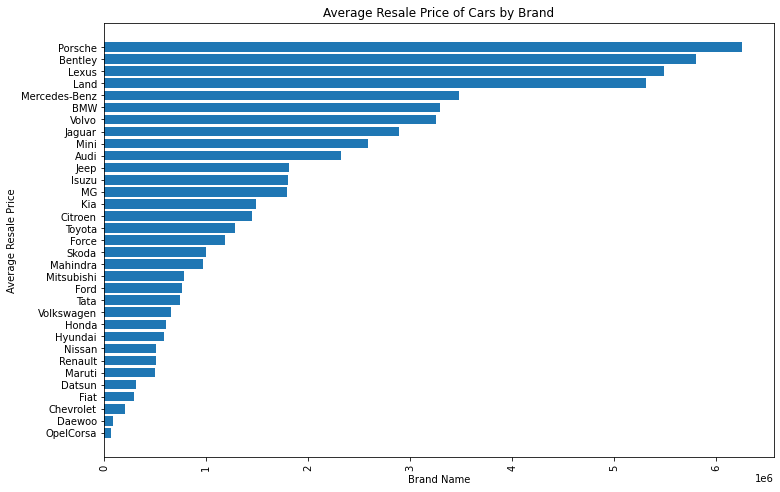

In [202]:

average_resale_price_by_brand = cars.groupby('brand_name')['resale_price'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(average_resale_price_by_brand.index, average_resale_price_by_brand.values)


plt.xlabel('Brand Name')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price of Cars by Brand')
plt.xticks(rotation=90)

plt.show()


Porche, Bentley, Lexus, Landrover, Mercedes-Benz and BMW are the top costliest car brands out there, with the top four
much ahead of the others in the race

Text(0.5, 1.0, 'Average Resale Price of Cars by Transmission mode')

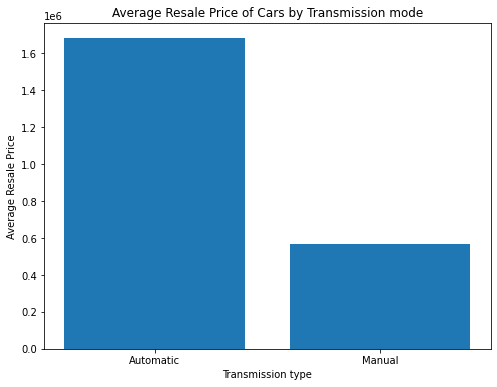

In [471]:

average_resale_price_by_brand = cars.groupby('transmission_type')['resale_price'].mean()


plt.figure(figsize=(8, 6))
plt.bar(average_resale_price_by_brand.index, average_resale_price_by_brand.values)
plt.xlabel('Transmission type')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price of Cars by Transmission mode')




Despite being less in quantity in the data, the few automatic cars are much higher priced than the manual counterparts.

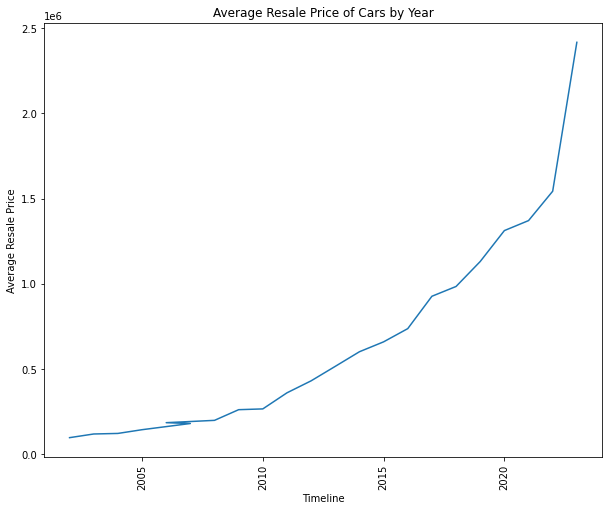

In [464]:

average_resale_price_by_brand = cars.groupby('registered_year')['resale_price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(average_resale_price_by_brand.index, average_resale_price_by_brand.values)

# Labels and title
plt.xlabel('Timeline')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price of Cars by Year')

plt.xticks(rotation=90)
# Show the plot
plt.show()

The older the vehicle, the lesser is its value.

Text(0.5, 1.0, 'Average Resale Price of Cars by insurance availability')

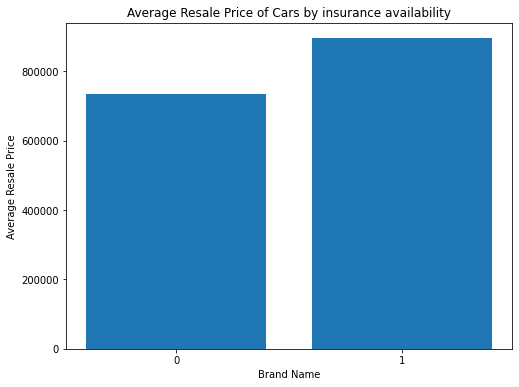

In [258]:

average_resale_price_by_brand = cars.groupby('insurance')['resale_price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(average_resale_price_by_brand.index, average_resale_price_by_brand.values)

# Labels and title
plt.xlabel('Brand Name')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price of Cars by insurance availability')

# Show the plot

Insured cars have a slight edge over the non-insured cars

Text(0.5, 1.0, 'Average Resale Price of Cars by number of owners it had')

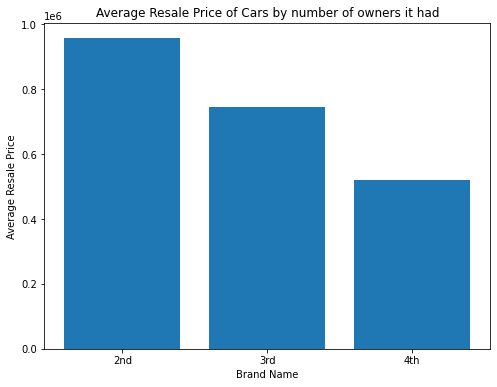

In [469]:


average_resale_price_by_brand = cars.groupby('Hand')['resale_price'].mean()


plt.figure(figsize=(8, 6))
plt.bar(average_resale_price_by_brand.index, average_resale_price_by_brand.values)


plt.xlabel('Brand Name')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price of Cars by number of owners it had')


The amount of owners the car has been used by clearly affects its price heavily.

Text(0.5, 1.0, 'Average Resale Price of Cars by seating capacity')

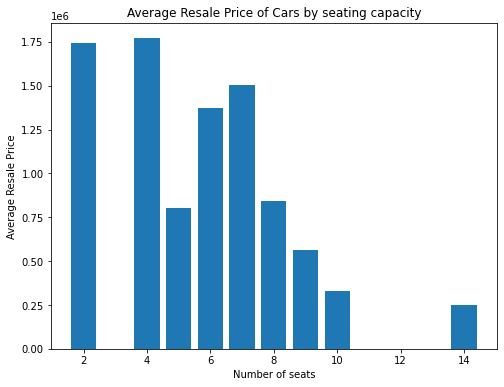

In [470]:

average_resale_price_by_brand = cars.groupby('seats')['resale_price'].mean()


plt.figure(figsize=(8, 6))
plt.bar(average_resale_price_by_brand.index, average_resale_price_by_brand.values)


plt.xlabel('Number of seats')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price of Cars by seating capacity')


No real pattern as such. Two seated cars are generally racing cars/coupes which are on the higher end, and hence would be this distorted result.

Text(0.5, 1.0, 'Average Resale Price of Cars by insurance availability')

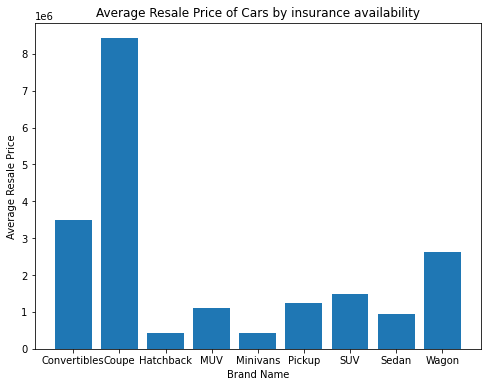

In [467]:

average_resale_price_by_brand = cars.groupby('body_type')['resale_price'].mean()


plt.figure(figsize=(8, 6))
plt.bar(average_resale_price_by_brand.index, average_resale_price_by_brand.values)


plt.xlabel('Brand Name')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price of Cars by insurance availability')


From the above analysis, we can conclude that the reselling price of a car is directly related to its transmission type, maximum power,insurance and engine capacity and inversely proportional to its mileage,how many hands it has had and how old it is. Diesel cars are slightly higher priced than the petrol cars while electric vehicles overtake both of them. Coupe cars are the costliest ones followef by Convertibles and Wagon.

## Comparing fuel types

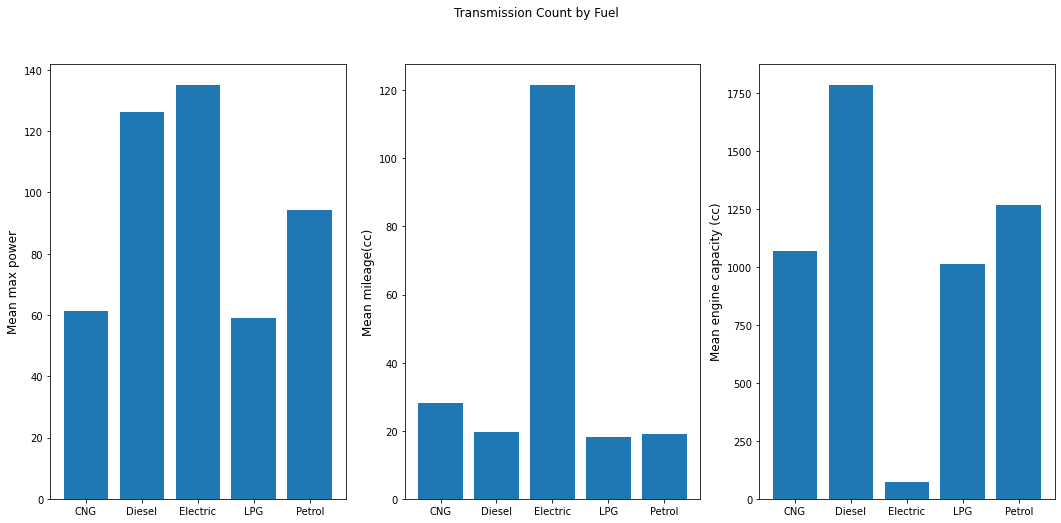

In [353]:

fig, ax = plt.subplots(1, 3, figsize=(18, 8), sharex=True)


a = cars.groupby('fuel_type')


ax[0].bar(a['max_power(bhp)'].mean().index, a['max_power(bhp)'].mean().values)
ax[1].bar(a['mileage(kmpl)'].mean().index, a['mileage(kmpl)'].mean().values)
ax[2].bar(a['engine_capacity(cc)'].mean().index, a['engine_capacity(cc)'].mean().values)


ax[0].set_ylabel('Mean max power', fontsize='large')
ax[1].set_ylabel('Mean mileage(cc)', fontsize='large')
ax[2].set_ylabel('Mean engine capacity (cc)', fontsize='large')


plt.suptitle('Transmission Count by Fuel', fontsize='large')
plt.show()


Since electric vehicles do not use any fuel, they dont have  any engine capacity or mileage, hence we remove them from the two plots

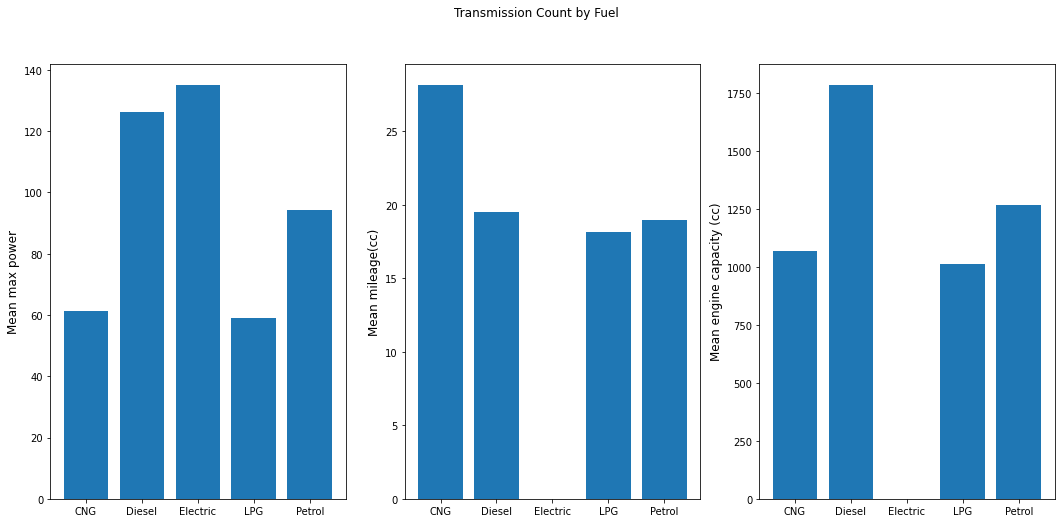

In [362]:
cars_filtered = cars[cars['fuel_type'] != 'Electric']

fig, ax = plt.subplots(1, 3, figsize=(18, 8), sharex=True)


ab = cars_filtered.groupby('fuel_type')


ax[0].bar(a['max_power(bhp)'].mean().index, a['max_power(bhp)'].mean().values)
ax[1].bar(ab['mileage(kmpl)'].mean().index, ab['mileage(kmpl)'].mean().values)
ax[2].bar(ab['engine_capacity(cc)'].mean().index, ab['engine_capacity(cc)'].mean().values)

ax[0].set_ylabel('Mean max power', fontsize='large')
ax[1].set_ylabel('Mean mileage(cc)', fontsize='large')
ax[2].set_ylabel('Mean engine capacity (cc)', fontsize='large')




plt.suptitle('Transmission Count by Fuel', fontsize='large')

plt.show()


In terms of performance electric cars are the best,closely followed by diesel cars. Diesel has good engine capacity too and has average mileage rate.

## When did we turn from manual to automatic vehicles

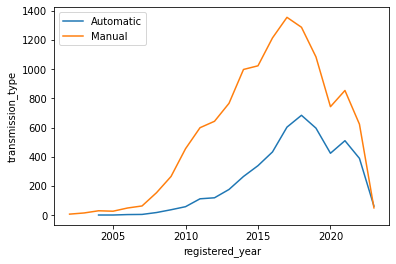

In [326]:
automatic_count= cars[cars['transmission_type']=='Automatic'].groupby('registered_year')['transmission_type'].count()
manual_count= cars[cars['transmission_type']=='Manual'].groupby('registered_year')['transmission_type'].count()
sns.lineplot(automatic_count,label="Automatic")
sns.lineplot(manual_count, label='Manual')
plt.legend()

Automatic vehicles have surging alongwith the surge of manual vehicles too (i.e. basically the amount of resold vehicles rate itself is great, but the surge of automated vehicles is much more rapid, though both of them seem to have dipped since 2020, likely because of the global pandemic.

In [ ]:
plt.bar(automatic_count['max_power(bhp'])

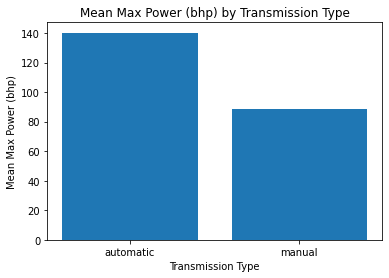

In [370]:
automatic= cars[cars['transmission_type']=='Automatic']
manual= cars[cars['transmission_type']=='Manual']


plt.bar(['automatic','manual'],height=[automatic['max_power(bhp)'].mean(),manual['max_power(bhp)'].mean()])
plt.xlabel('Transmission Type')
plt.ylabel('Mean Max Power (bhp)')
plt.title('Mean Max Power (bhp) by Transmission Type')

# Show the plot
plt.show()

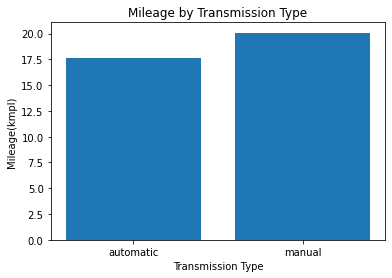

In [474]:
automatic= cars[cars['transmission_type']=='Automatic']
manual= cars[cars['transmission_type']=='Manual']


plt.bar(['automatic','manual'],height=[automatic['mileage(kmpl)'].mean(),manual['mileage(kmpl)'].mean()])
plt.xlabel('Transmission Type')
plt.ylabel('Mileage(kmpl)')
plt.title('Mileage by Transmission Type')

# Show the plot
plt.show()

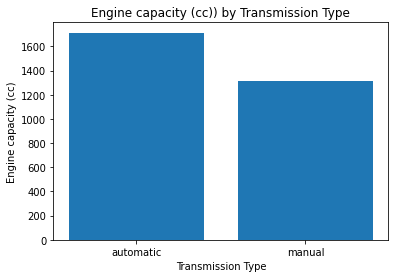

In [476]:
automatic= cars[cars['transmission_type']=='Automatic']
manual= cars[cars['transmission_type']=='Manual']


plt.bar(['automatic','manual'],height=[automatic['engine_capacity(cc)'].mean(),manual['engine_capacity(cc)'].mean()])
plt.xlabel('Transmission Type')
plt.ylabel('Engine capacity (cc)')
plt.title('Engine capacity (cc)) by Transmission Type')

# Show the plot
plt.show()

Automatic cars are better in all aspects.

In [382]:
tab= pd.crosstab(cars['transmission_type'],cars['fuel_type'])
tab

fuel_type,CNG,Diesel,Electric,LPG,Petrol
transmission_type,,,,,
Automatic,0,1890,56,0,2890
Manual,496,3542,0,29,8237


<AxesSubplot:xlabel='transmission_type'>

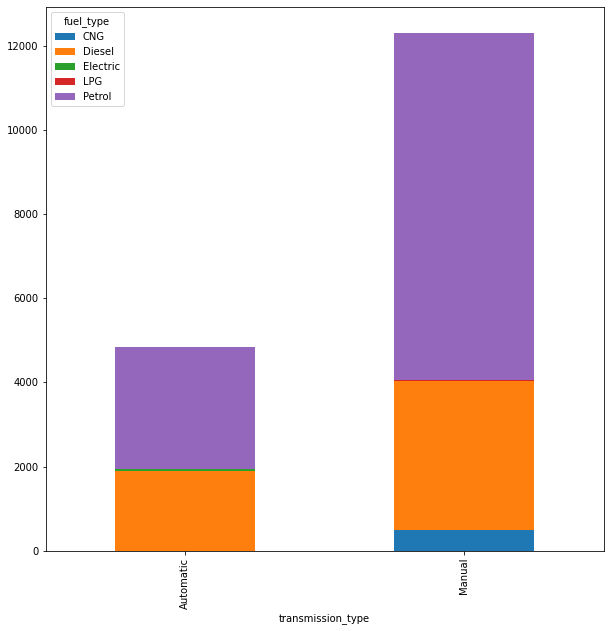

In [384]:

tab.plot(kind='bar',stacked=True,figsize=(10,10))

Conclusions: 
    1) All eletric vehicles are automatic
    2)Automatic vehicles work only on diesel,petrol or electricity
    3)All CNG and LPG vehicles are manual.

In [398]:
tab2= pd.crosstab(cars['seats'],cars['body_type'])
tab2


body_type,Convertibles,Coupe,Hatchback,MUV,Minivans,Pickup,SUV,Sedan,Wagon
seats,,,,,,,,,
2.0,0,0,0,0,0,4,1,0,0
4.0,2,4,85,0,0,0,71,24,0
5.0,0,6,7119,0,34,9,3203,4686,2
6.0,0,0,17,59,0,0,108,0,0
7.0,0,0,0,568,16,0,887,1,0
8.0,0,0,0,113,4,0,29,0,0
9.0,0,0,0,1,0,0,23,0,0
10.0,0,0,0,2,0,0,0,0,0


<AxesSubplot:xlabel='body_type', ylabel='seats'>

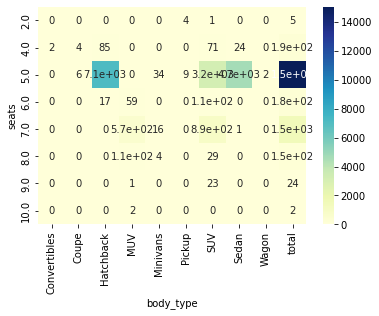

In [425]:

sns.heatmap(tab2, annot=True, cmap='YlGnBu')  # annot=True to show the counts, fmt='d' to format as integer


<AxesSubplot:xlabel='city', ylabel='brand_name'>

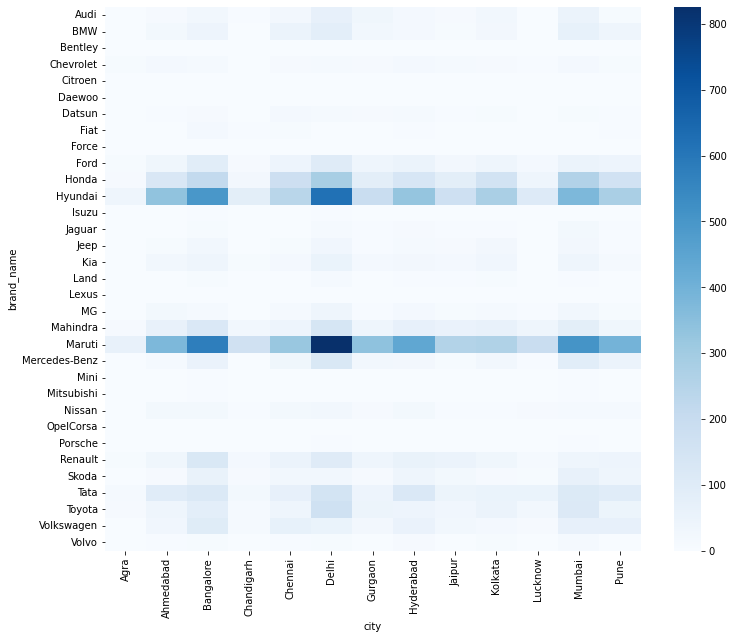

In [439]:
tab3= pd.crosstab(cars['brand_name'],cars['city'])
plt.figure(figsize=(12,10))
sns.heatmap(tab3,cmap='Blues')

Maruti and Hyundai are the most resold brands in all cities, with Maruti being the number 1 sold brand in all cities except Kolkata where Hyundai rules.